✍ Представим, что мы уже создали рекомендательную систему и она работает. Возможно, мы даже внедрили её в продакшн. Разумеется, нам необходимо оценить, насколько качественно построена наша РС.

### Все метрики для оценки качества РС можно разделить на две группы:

+ офлайн-метрики (оценивают качество алгоритма);
+ онлайн-метрики (оценивают производительность и бизнес-показатели).

# ОФЛАЙН-МЕТРИКИ

Существует несколько категорий офлайн-метрик:

+ **Prediction Accuracy** — оценка точности предсказываемого рейтинга.
+ **Decision Support** — оценка релевантности рекомендаций.
+ **Rank Accuracy** — оценка качества рекомендаций с учётом ранжирования.

Рассмотрим каждую категорию подробнее.

## PREDICTION ACCURACY

Метрики *Prediction Accuracy* сравнивают прогнозируемые значения рейтинга с реальными оценками пользователей. Для того чтобы количественно оценить схожесть фактических и предсказанных данных, обычно используются уже знакомые вам метрики *MAE, MSE и RMSE,* которые вычисляются следующим образом:

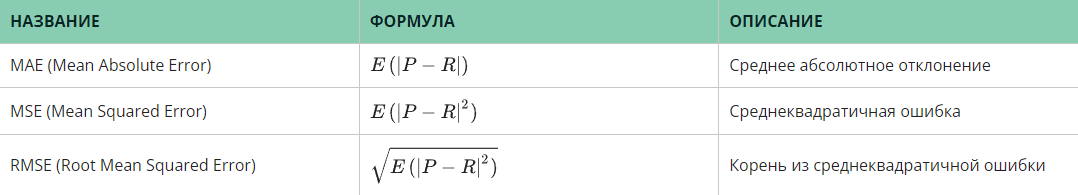

Здесь $P$ — предсказанные оценки, $R$ — реально выставленные оценки, $E$ — математическое ожидание.

### Чем ниже MAE и RMSE, тем лучше, ведь они дают нам представление о том, насколько точны наши прогнозные оценки и рекомендации.

Попробуем рассчитать значения метрик MAE и RMSE для некоторого алгоритма, если мы знаем реально выставленные и предсказанные алгоритмом оценки для четырёх фильмов:

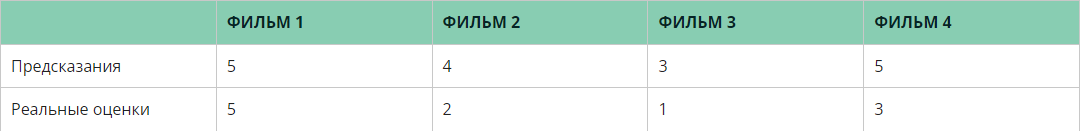

Чтобы вычислить MAE, сначала необходимо вычислить все разницы между предсказанными и реальными оценками:

1. 5-5=0
2. 4-2=2
3. 3-1=2
4. 5-3=2

Теперь сложим модули всех получившихся разниц и разделим результат на общее количество оценок:

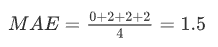

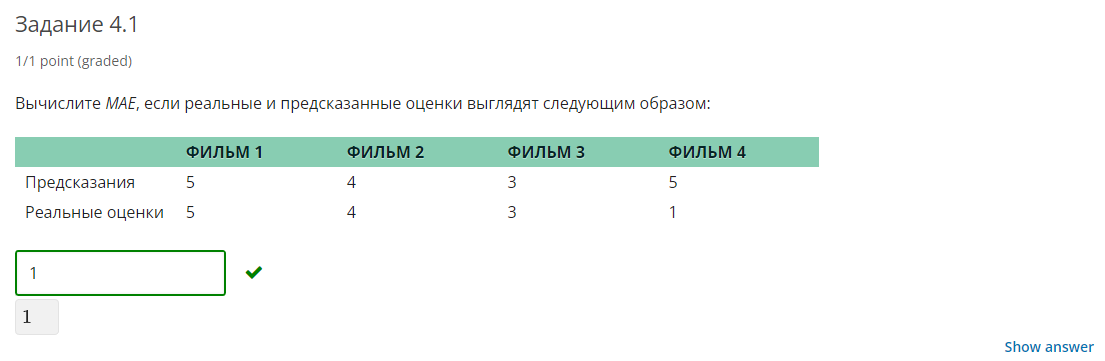
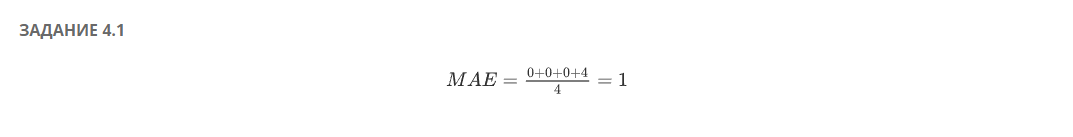

Теперь для этого же случая рассчитаем RMSE. Напомним, что рассматриваемые оценки выглядят следующим образом:

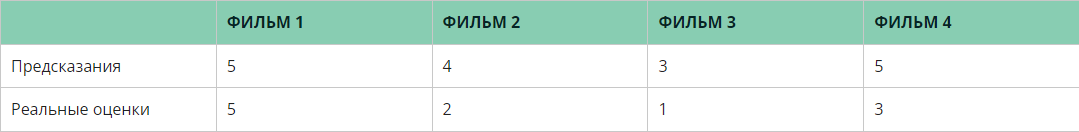

Мы уже нашли разницы между реальными и предсказанными значениями: $0,2,2,2$.

Теперь нам необходимо возвести их в квадрат — получаем $0,4,4,4$.

После этого ищем среднее арифметическое для суммы квадратов разниц и извлекаем из результата корень:

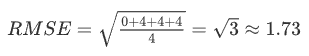

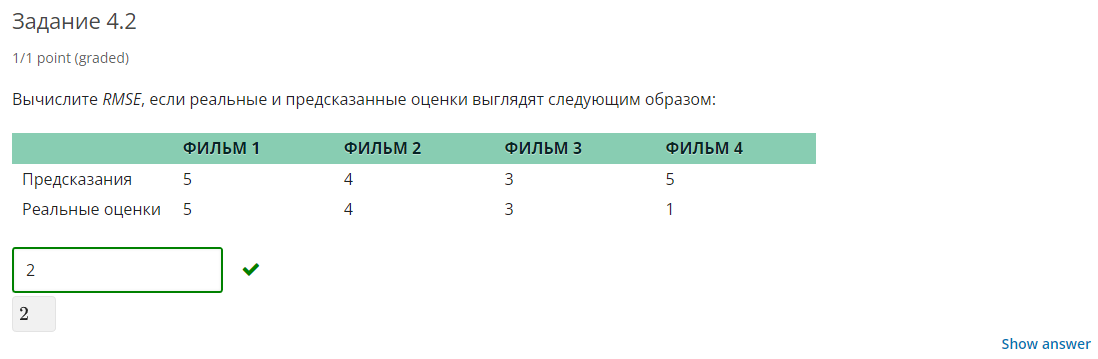
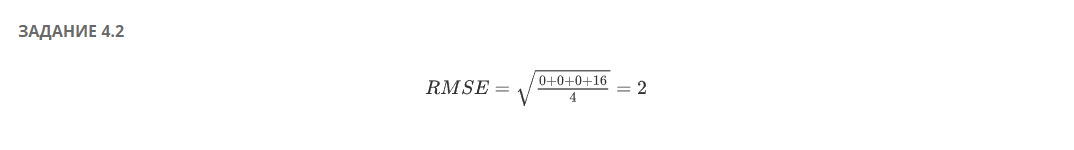

Для того чтобы вычислить MAE и RMSE при построении рекомендательной системы, можно воспользоваться уже известными вам готовыми функциями из модуля sklearn:

+ [sklearn.metrics.mean_absolute_error(y_true, y_pred);](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
+ [sklearn.metrics.mean_squared_error(y_true, y_pred).](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

## DECISION SUPPORT

Следующие метрики — это уже знакомые вам по задаче классификации recall и precision.

По результатам построения рекомендательной системы мы можем создать матрицу ошибок, которая будет выглядеть следующим образом:

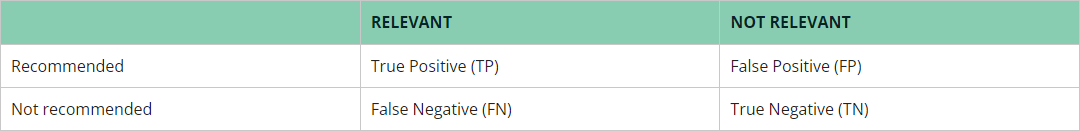

и рассчитать интересующие нас метрики:

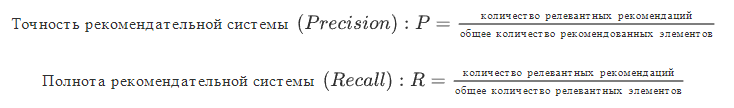



### Однако при вычислении этих метрик мы совершенно не учитываем ранжирование рекомендаций, хотя должно иметь значение, определены правильно самые первые рекомендации (например, те фильмы, которые понравятся пользователю в первую очередь и заслужат у него наивысшие оценки) или лишь последние. Чтобы преодолеть эту проблему, эти метрики используются с отсечением $k$ рекомендаций.

*Precision* и *recall* в точке отсечения $k$, $P@k$ и $R@kk$ — это просто *precision* и *recall*, рассчитанные с учётом только подмножества рекомендаций от ранга $1$ до $k$.



К примеру, ниже представлены расчёты для $P@3$ (precision c отсечением 3) и  $P@5$(precision с отсечением 5):

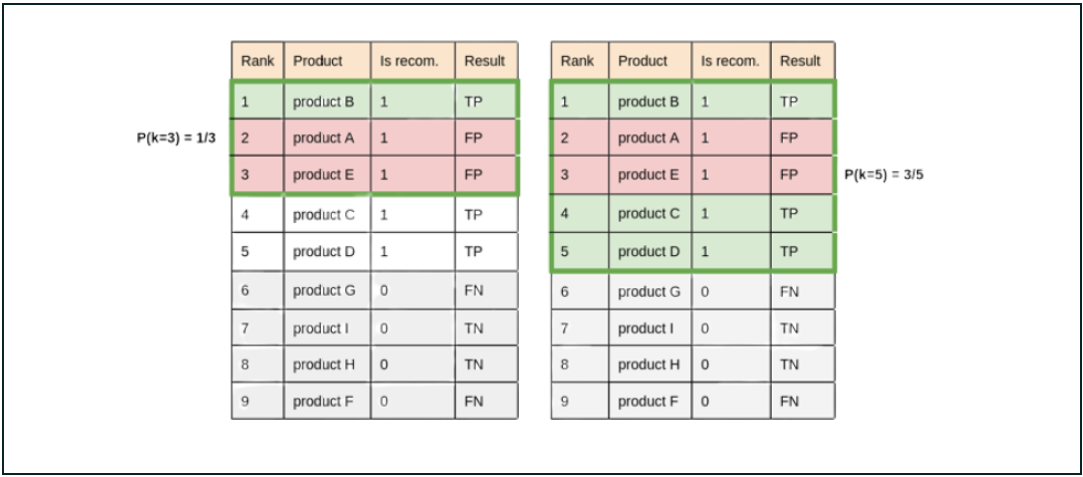
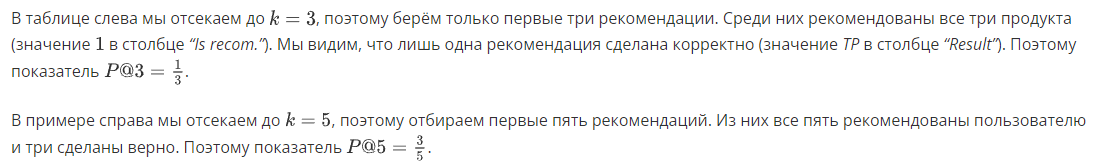


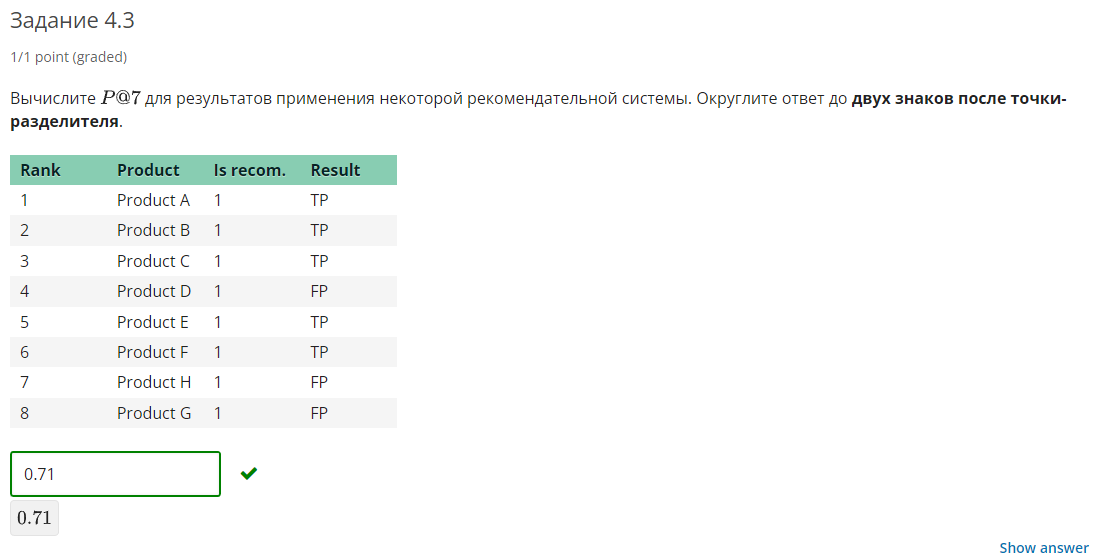
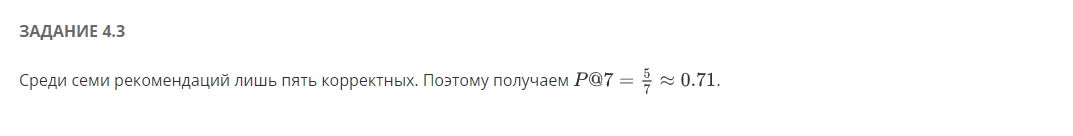

Теперь рассмотрим вычисление метрики recall с отсечением.

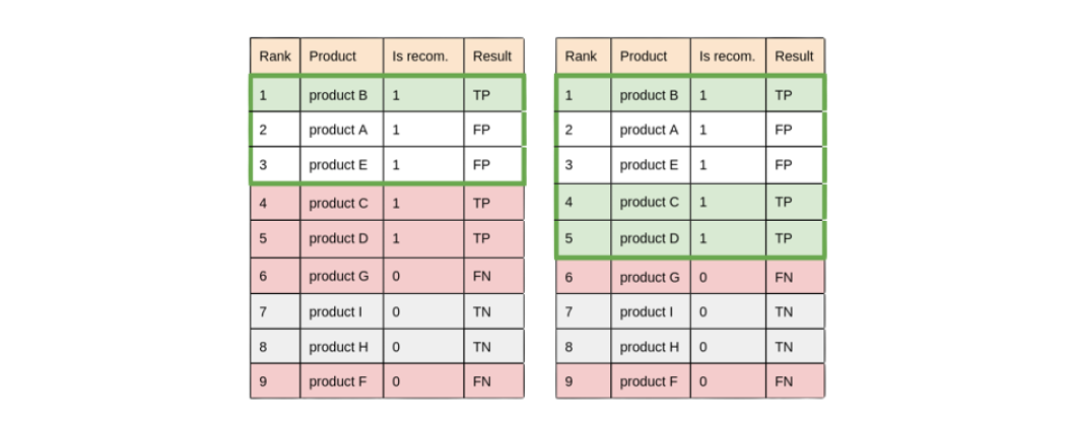

### В данной таблице зелёным выделены релевантные рекомендации, белым — нерелевантные.

Среди трёх рекомендаций в таблице слева есть лишь один релевантный продукт, и он подобран верно. Поэтому $R@3 = 1$.

Среди пяти рекомендаций в таблице справа есть три релевантных объекта, и все они верно определены. Так что получаем также $R@5 = 1$.

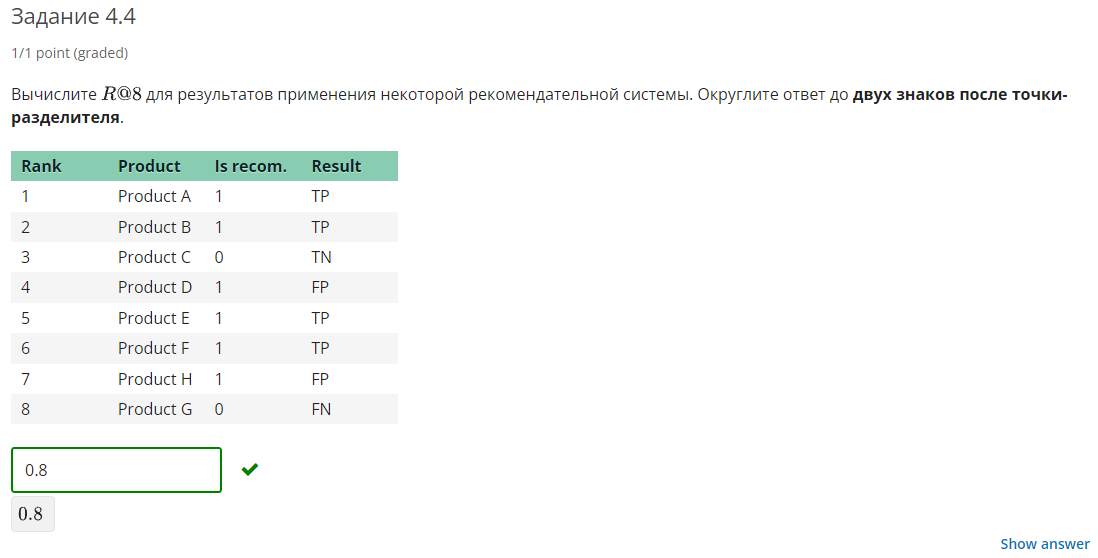
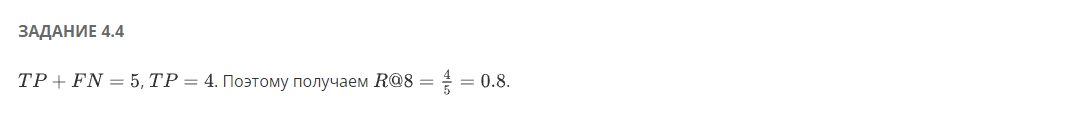

### К сожалению, в известных нам библиотеках для машинного обучения эти функции не реализованы. Для оценки качества рекомендуем использовать модуль [cute_ranking](https://github.com/ncoop57/cute_ranking).

## RANK ACCURACY

Рекомендательные системы должны быть способны помещать наиболее релевантные элементы на высокие позиции в списке рекомендаций. Первый рекомендуемый элемент всегда самый важный, следующий — второй по важности и т. д.

Сейчас мы рассмотрим метрики, которые как раз учитывают положение продукта в рейтинге:

+ *MRR (Mean Reciprocal Rank);*
+ *MAP (Mean Average Precision);*
+ *NDCG (Normalized Discounted Cumulative Gain).*

### MRR (СРЕДНИЙ РЕЦИПРОКНЫЙ РАНГ)

Это самая простая метрика из трёх перечисленных. Она определяет, где среди рекомендованных находится первый релевантный элемент.

В общем виде формулу для этой метрики можно записать следующим образом:

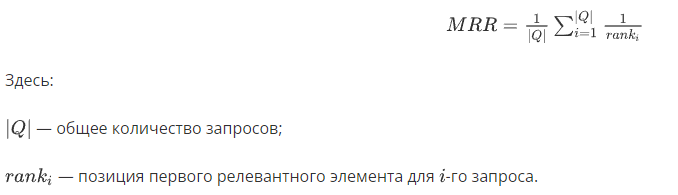

Ниже представлен пример вычисления MRR. Для каждого пользователя мы находим первый релевантный элемент и вычисляем, сколько элементов к этому моменту уже было предложено пользователю. Далее делим  на это количество. После этого находим среднее арифметическое для всех полученных долей.

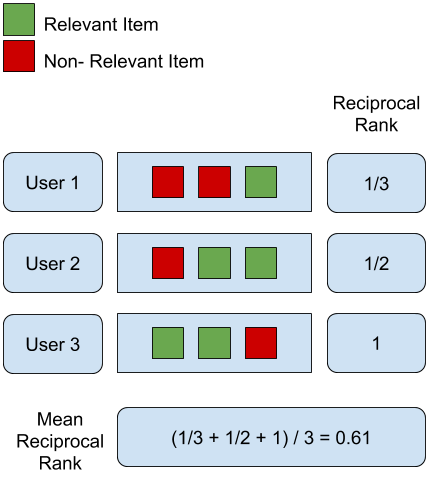

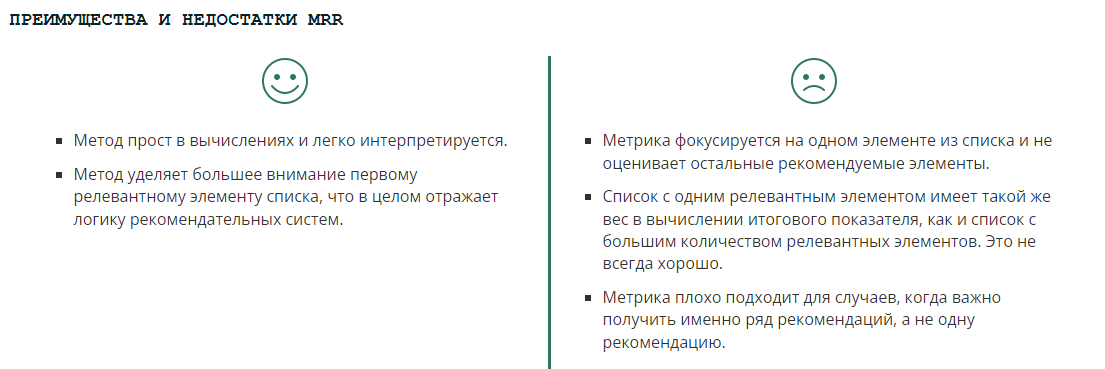

Для вычисления MRR в Python рекомендуем использовать функцию mean_reciprocal_rank() из библиотеки [cute_ranking](https://github.com/ncoop57/cute_ranking).

### MAP (СРЕДНЯЯ ТОЧНОСТЬ)

Допустим, у нас есть набор данных и мы хотим оценить весь список рекомендуемых элементов до определённого отсечения $N$, как мы делали, к примеру, с $precision@N$. Метрика $P@N$ вычисляет долю рекомендаций, которые являются хорошими. Её недостатком является то, что она рассматривает весь список как набор элементов и одинаково относится ко всем ошибкам в рекомендуемом списке (т. е. неважно, ошиблись мы в первой рекомендации или в десятой). Нам же важно придать больший вес ошибкам в верхней части списка, а затем постепенно уменьшать их значимость по мере продвижения вниз по списку.

Метрика MAP помогает достичь этой цели. Посмотрим, как она вычисляется:

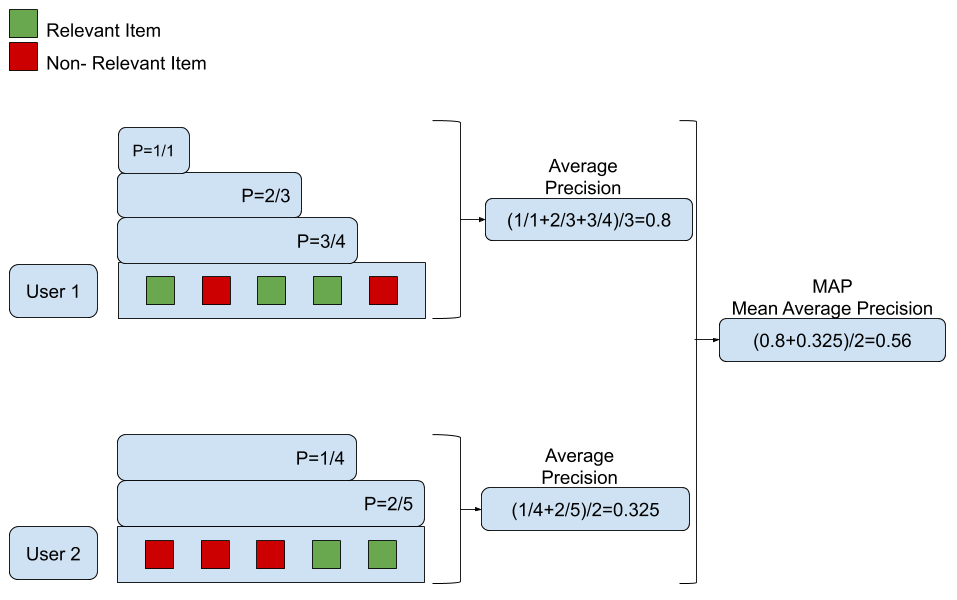

Для каждого пользователя мы вычисляем долю релевантных рекомендаций для всех возможных отсечений по релевантным элементам и далее усредняем для каждого пользователя получившиеся доли. Для итогового результата усредняем показатели по всем пользователям.

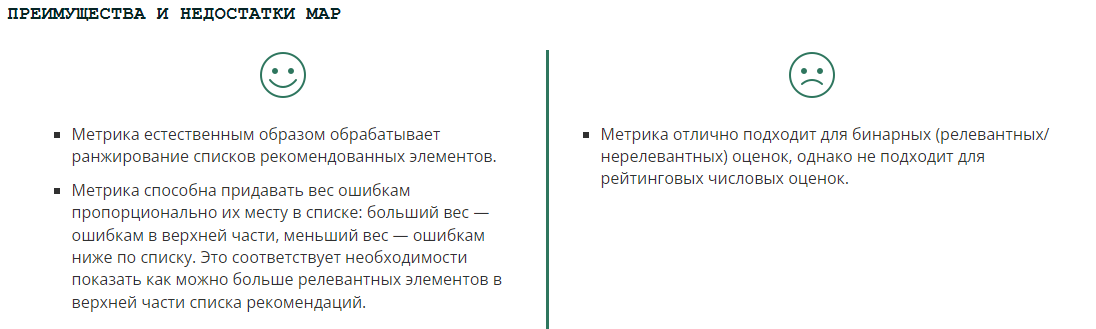

### NDCG (НОРМАЛИЗОВАННЫЙ ДИСКОНТИРОВАННЫЙ КУМУЛЯТИВНЫЙ ВЫИГРЫШ)

Подход к вычислению этой метрики схож с подходом к вычислению MAP: в обоих случаях высоко ценится выдача релевантных продуктов на первых позициях. Однако метрика NDCG позволяет использовать информацию о том, что разные продукты имеют разную степень релевантности, то есть учитывает их рейтинг.

Чтобы понять, как вычисляется NDCG, реализуем вычисления последовательно.

Представим, что поисковая система выдаёт пять статей с именами D1, D2, D3, D4, D5, которые выводятся в таком же порядке. Определим шкалу релевантности (0–3), где:

+ 0 — не релевантно;
+ 1–2 — в некоторой степени релевантно;
+ 3 — полностью релевантно.

Предположим, статьи имеют следующие оценки релевантности:

+ D1 — 3;
+ D2 — 2;
+ D3 — 0;
+ D4 — 0;
+ D5 — 1.

Кумулятивный выигрыш представляет собой сумму этих оценок релевантности и может быть рассчитан как:

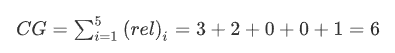

Здесь $rel$ — оценка релевантности документа.

Дисконтированный кумулятивный выигрыш можно рассчитать по формуле:

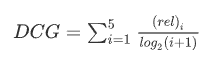

Таким образом, дисконтированный кумулятивный выигрыш в приведённом выше примере составляет:

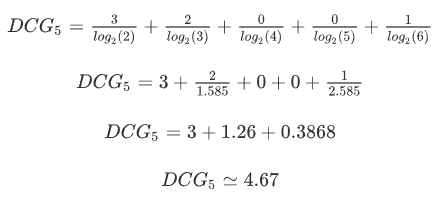

Теперь нам нужно расположить статьи в порядке убывания рейтинга и рассчитать DCG, чтобы получить рейтинг идеального дисконтированного кумулятивного выигрыша (IDCG):

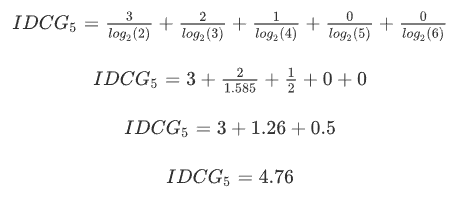

Рассчитаем нормализованный DCG по следующей формуле:

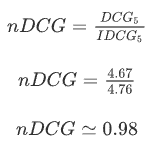



Можно получить то же значение, если воспользоваться готовой функцией из модуля sklearn:

In [1]:
from sklearn.metrics import ndcg_score, dcg_score
import numpy as np

true = np.asarray([[3, 2, 1, 0, 0]])
relevance = np.asarray([[3, 2, 0, 0, 1]])

print(ndcg_score(true, relevance))

0.980840401274087


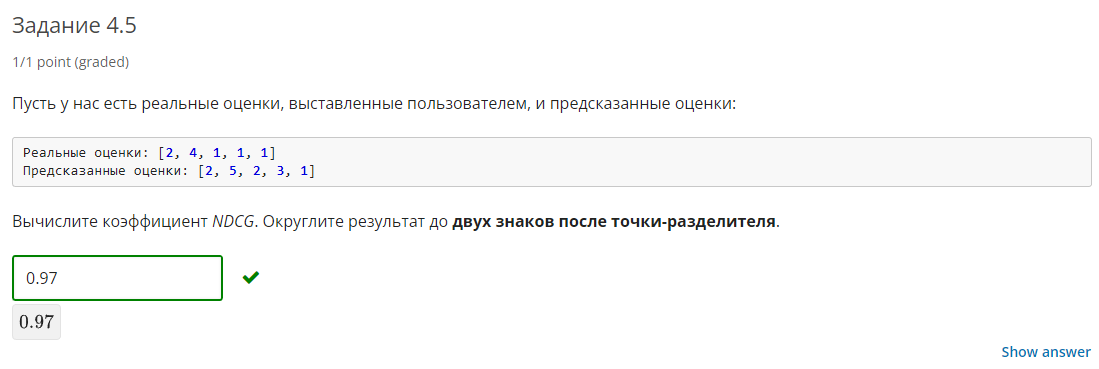

In [2]:
from sklearn.metrics import ndcg_score, dcg_score
import numpy as np

true = np.asarray([[2, 4, 1, 1, 1]])
relevance = np.asarray([[2, 5, 2, 3, 1]])

print(ndcg_score(true, relevance))

0.9748317848747132


# ОНЛАЙН-МЕТРИКИ

Выделяют пять групп бизнес-показателей, на которые рекомендательные системы оказывают самое существенное влияние:

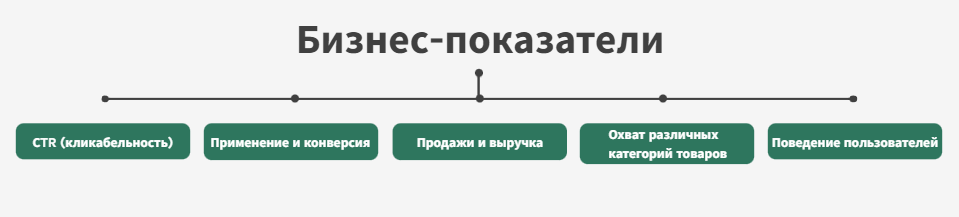

[Ткни](https://view.genial.ly/6358040e1b7a360011f0c2ad/interactive-content-dst-30-mathandml-14unit4)

По данным Netflix, пользователи выбирают 75 % контента на основе рекомендаций. Компании также удалось снизить отток клиентов на несколько процентов, что в конечном итоге приносит около миллиарда долларов в год (компания использует модель подписки). В свою очередь YouTube сообщает, что 60 % кликов на домашней странице приходится на блок с рекомендациями.

Однако во многих случаях выгода от рекомендательных систем может быть не такой очевидной — следует понимать, на какие метрики смотреть. Так, например, после внедрения рекомендательных систем в онлайн-магазине было замечено, что рост по рекомендуемым товарам составил всего 0.3 %. При этом средний рост по товарам в той же категории достиг 26 %. Получается, что внедрение рекомендаций может стимулировать дополнительные продажи, несмотря на то что пользователь не выбирал продукт из рекомендуемого списка.

Так как выстраивание бизнес-процессов выходит за рамки компетенций дата-сайентиста, мы не будем останавливаться на перечисленных выше бизнес-метриках подробнее, однако рекомендуем вам помнить о них при построении вашей РС.

Итак, мы рассмотрели основные метрики, с помощью которых можно оценить качество построенной рекомендательной системы. Уже совсем скоро вы сможете применить их на практике в реальных задачах.